Team members: 
* Fatou SALL
* Sebastion COUBE




In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import lil_matrix
import seaborn as sns
import networkx as nx
import operator
import community
from networkx.algorithms import community
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
import time
from networkx.drawing.nx_agraph import graphviz_layout
from scipy import linalg, cluster, sparse
from tqdm import tqdm_notebook
from utils import get_bag_of_communities

from utils import load_obj, save_obj

## Introduction

Le clustering sont des outils d'analyse des données qui permettent de grouper des échantillons, de sorte que les membres d'un même groupe (ou *cluster*) sont très similaires, alors que ceux de groupes différents ne le sont pas. Dans la suite, nous allons préciser explorer Clustering Spectral. 

>-Soit $G = (V,E)$ un graphe non orienté avec $V$ l'ensemble des sommets et $E$ l'ensemble des arrets avec un poid non negative $w_{ij} ≥ 0$.


>-La matrice adjacente du graphe $G$ est la matrice $W = (w_{ij})$ $i,j=1,...,n$.

>-Le degrée d'un sommet $v_i \in V$ est defini par $d_i = \sum\limits_{j=1}^n w_{ij}$.

>-Le degrée matricielle $D$ est défini par une matrice diagonale ayant pour diagonales les degrées $d_1, . . . , d_n$.

### Graphe de similitude
Il y a plusieurs façon de transformer un ensemble donné de points $x_1, . . . , x_n$ doté d'une matrice de similarités $s_{ij}$ ou d'une matrice de distance $d_{ij}$ en un graphe. Lorsque l'on construit un graphe de similitude, le but est de modéliser la relation de voisin proche entre les points.

- Le **ε-voisinage graphe** : On connecte tous les points dont la distance l'un l'autre est plus petite que ε.

- Le **k-plus proche voisin graphe** : Ici le but est de connecter $v_i$ avec le sommet $v_j$ if $v_j$ est parmi les k-plus proches voisins de $v_i$ mais comme la relation de voisin n'est pas forcément symetrique, on considère deux différentes constructions.

    - Le **k-plus proche voisin graphe** : On ignore les directions des arêtes, on connecte $v_i$ et $v_j$ avec une arête non orientée si $v_i$ est parmi les k-plus proches voisins de $v_j$ ou si $v_j$ est parmi les k-plus proches voisins de $v_i$.
    - Le ** mutuel k-plus proche voisin graphe** : On connecte les sommets $v_i$ et $v_j$ si on a $v_i$ est parmi les k-plus proches voisins de $v_j$ et si $v_j$ est parmi les k-plus proches voisins de $v_i$.

- Le **graphe complet** : Ici on connecte simplement l'ensemble des points avec une similaritée positive, le poids de chaque arête étant $s_{ij}$.


### Graphe Laplaciens et leurs propriétés basiques 
#### Graphe laplacien normalisé

Il y'a deux matrices utilisées pour définir le laplacien non normalisé: 
> - L est semi-definie positive ,

> -  0 est une valeur propre et ${\rm I\!1}$ est la valeur propre associé,



         
         
#### Graphe laplacien non normalisé
Deux types de matrice sont utilisée:
La matrice du graphe Laplacien non normalisé est défini par $L = D − W$.


### Spectral clustering non normalisé
Our algorithm has been previously described in (Ng et al, 2002). Provided a set of points $S= {s_1,...,s_n}$ in $\mathbb{R}^l$ that we want to clsuter into $k$ subsets:

> $1.$ Define the affinity matrix $A \in \mathbb{R}^{nxn}$ by $A_{ij}=exp(-||s_i-s_j||^2 / 2\sigma^2)$ if $i\neq{j}$, and $A_{ii}=0$.
    
    
> $2.$ Create a diagonal matrix whose ($i$,$i$) element is the sum of $A's$ i-th row, and construct L, where $L= D^{-1/2}AD^{-1/2}$.
    
    
> $3.$ Find ${x_1,...,x_n}$, the $k$ largest eigenvectors of $L$, which are chosen to be orthogonal to one another in the chance there are repeated eigenvalues. Then create the matrix $X$, by placing the k eigenvectors in columns.
    
    
> $4.$ Use $X$ to form the matrix $Y$, by normalizing each X's rows to have unit length (i.e. $Y_{ij}=X_{ij}/(\sum_{j}{}X_{ij}^2)^{1/2}$). 
    
    
> $5.$ Treating each row of $Y$ as a point in $\mathbb{R}^k$, cluster into $k$ clusters using K-means
    
    
> $6.$ Assign the original point $s_i$ to cluster $j$ if row $i$ of the matrix $Y$ was assigned to cluster $j$. 



###  Spectral clustering normalisé
Our algorithm has been previously described in (Ng et al, 2002). Provided a set of points $S= {s_1,...,s_n}$ in $\mathbb{R}^l$ that we want to clsuter into $k$ subsets:

> $1.$ Define the affinity matrix $A \in \mathbb{R}^{nxn}$ by $A_{ij}=exp(-||s_i-s_j||^2 / 2\sigma^2)$ if $i\neq{j}$, and $A_{ii}=0$.
    
    
> $2.$ Create a diagonal matrix whose ($i$,$i$) element is the sum of $A's$ i-th row, and construct L, where $L= D^{-1/2}AD^{-1/2}$.
    
    
> $3.$ Find ${x_1,...,x_n}$, the $k$ largest eigenvectors of $L$, which are chosen to be orthogonal to one another in the chance there are repeated eigenvalues. Then create the matrix $X$, by placing the k eigenvectors in columns.
    
    
> $4.$ Use $X$ to form the matrix $Y$, by normalizing each X's rows to have unit length (i.e. $Y_{ij}=X_{ij}/(\sum_{j}{}X_{ij}^2)^{1/2}$). 
    
    
> $5.$ Treating each row of $Y$ as a point in $\mathbb{R}^k$, cluster into $k$ clusters using K-means
    
    
> $6.$ Assign the original point $s_i$ to cluster $j$ if row $i$ of the matrix $Y$ was assigned to cluster $j$. 





## Algorithme

### Etape 1  : Calcul du laplacien

In [3]:
def diag_matrice_degre(w):
    #print("0-Calcul de la matrice dégré d ..................... ")
    return np.diag(np.sum(w,axis=1))


def laplacien(w):
    print("0-Calcul de la matrice dégré d ..................... ")
    return diag_matrice_degre(w)-w   

### Etape 2 : Calcul des k vecteurs associés aux k plus petites valeurs propres du laplacien

In [4]:
def k_vector_propre(L,k): 
    print("2-Calcul des {} vecteurs associés aux {} plus petites valeurs propres du laplacien ..................... ".format(k,k))
    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_index = np.argsort(eigenvalues)
    eigenvectors=np.array(eigenvectors)
    plt.plot(eigenvalues, '.-', markersize=15)
    plt.imshow
    return eigenvectors[:,sorted_index[0:k]]
    


### Etape 3  : Partitionnement des vecteurs propres en avec kmeans

In [5]:
def spectralClustering(w,k,normalise=False):
    if normalise:
        n = w.shape[0]
        d = np.zeros((n, n))
        for i in range(n):
            d[i, i] = 1 / (w[i].sum())
            
        print("1-Calcul du laplacien ..................... ")     
        L =  np.sqrt(d).dot(w).dot(np.sqrt(d))
        x= k_vector_propre(L,k)
        Y = X / np.sum(X, 1)[:, np.newaxis]
        print("3-Partitionnement des vecteurs propres en avec kmeans ..................... ")
   
        return Kmeans(Y,k)
    else:
        print("1-Calcul du laplacien ..................... ")
        L=laplacien(w)
        Y=k_vector_propre(L,k) 
        print("3-Partitionnement des vecteurs propres en avec kmeans ..................... ")
   
        return Kmeans(Y,k)

def initialize(X,K):
    print('Initialisation des clusters .....................\n ')
    centers = X[random.sample(range(0,(X.shape[0]-1)),K)]
    return centers

def assignment(X, centers):
    indx = []
    for point in X:
        norm = np.linalg.norm((centers-point), axis =1)
        indx.append(np.argmin(norm))
    return indx

def updateCenters(X,K,indx):

    newCenters = []
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        centroid = Cluster.mean(axis=0)
        newCenters.append(centroid)
    return newCenters

def AvgScore(X,K,indx,centers):
    score = []
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        distanceList = np.linalg.norm((Cluster-centers[clusterNumber]), axis =1)
        score.append(np.mean(distanceList))
            
    return score



def Kmeans(X,K,tol=0.0001,plot=False,stat=False):
    X = np.array(X)
    centers = initialize(X,K)
    indx = assignment(X, centers)
    AvgScore(X,K,indx,centers)
    Distortion = 1
    #print('Mis à jours des clusters .....................\n ')
    while Distortion > tol:
        newCenters = updateCenters(X,K,indx)
        newIndx = assignment(X, newCenters)
        
        scoreOld = AvgScore(X,K,indx,centers)
        scoreNew = AvgScore(X,K,newIndx,newCenters)
        
        Distortion = np.linalg.norm((np.array(scoreOld) - np.array(scoreNew)), axis =0)
        centers = newCenters
        indx = newIndx
        if stat:
            print('Score Old:',scoreOld,'\n')
            print('Score new:',scoreNew,'\n')
            print('Distortion:', Distortion)
            print('---------------------')
        
    if plot:
        DisplayPlot(X,K,centers,indx)
        
    return centers, indx, scoreNew

In [6]:
def DisplayPlot(X,K,centers,indx):
    colors = ['green', 'purple', 'yellow', 'red', 'orange', 'plum', 'navy', 'seagreen', 'pink', 'brown']
    for clusterNumber in range(0,K):
        Cluster = X[[i for i, find in enumerate(indx) if find == clusterNumber]]
        plt.scatter(Cluster[:,0],Cluster[:,1], marker='.' ,color=colors[clusterNumber])
        plt.scatter(np.array(centers)[clusterNumber,0],np.array(centers)[clusterNumber,1], marker='+' ,color='black')    
    plt.show()

In [7]:
def partitions(spectral_partition):
    partition = {}
    for i in range(k):
        comp=[]
        for title,labels in spectral_partition.items():
            if i==labels:
                comp.append(title)   
        partition[i]=set(comp)
    return list(partition.values())

## Application:

### Données simulées

In [8]:

from sklearn import cluster, datasets
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)
df = pd.DataFrame(noisy_moons[0]) ## convert to DF



#### Génération d'une matrice poids adjacente

In [9]:
def matrice_adjacente(X,gamma):
    n=X.shape[0]
    a=np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            a[i,j] = math.exp(-math.pow(np.linalg.norm((X[i]-X[j]),2),2) * gamma)
    return a
def construct_W(X, Wtemp, k_neighbors):
    scores_matrix = lil_matrix(Wtemp)
    # knn_matrix is a sparse matrix
    knn_matrix = kneighbors_graph(X, k_neighbors, mode='connectivity', include_self=True)
    W = knn_matrix.multiply(scores_matrix)  # pointwise multiply
    return W.toarray()

#### Visualisation des données

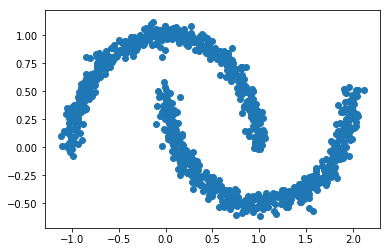

In [10]:


import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

 #### Détection de communauté:

1-Calcul du laplacien ..................... 
0-Calcul de la matrice dégré d ..................... 
2-Calcul des 2 vecteurs associés aux 2 plus petites valeurs propres du laplacien ..................... 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



3-Partitionnement des vecteurs propres en avec kmeans ..................... 
Initialisation des clusters .....................
 


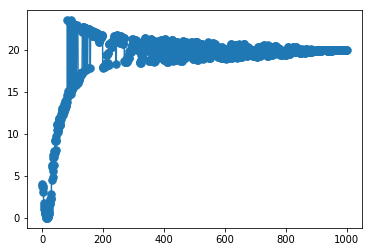

In [11]:
X = np.array(df)
A = matrice_adjacente(X,1)
w = construct_W(X,A,20)
centers_sim, indx_sim, score_sim = spectralClustering(w,2)


#### Visualition des communautés trouvées

C:\Anacond\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning:

Casting complex values to real discards the imaginary part



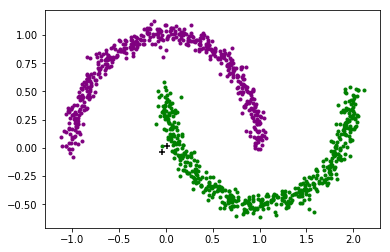

In [12]:
DisplayPlot(np.array(df),2,centers_sim,indx_sim)

### Application sur les données de Wikipedia

Nous aimerions savoir s'il est possible de détecter des communautés de pages simplement en regardant les liens hypertexte et de faire correspondre ces communautés avec des données du monde réel telles que les catégories de pages.



Nous utiliserons un sous-réseau du réseau d'hyperliens Wikipédia. Dans un tel graphe, chaque noeud est une page Wikipedia et il y a un lien entre le noeud $ a $ et le noeud $ b $ s'il y a un lien vers la page $ b $ sur la page $ a $.

#### Construction des graphes:


> - Commencez à partir d'une page racine arbitraire (préférez une page ambiguë afin d'obtenir autant de communautés différentes que possible).
> - Explorez cette page pour obtenir les liens intra-wiki: les premiers nœuds.
> - Pour chaque premier nœud, explorez les liens intra-wiki pour obtenir les deuxièmes nœuds.
> - Recherchez les connexions internes (liens de deuxièmes nœuds vers les premiers nœuds).
> - Finalement, pour chaque nœud, prenez l'intersection de son voisin avec les nœuds collectés (il se peut que certains nœuds aient des voisins qui n'ont pas été collectés, par exemple un deuxième nœud qui a été collecté depuis une page de désambiguïsation).

#### Parsing des données

In [13]:
print("")

#### Création des graphes

In [14]:
# save_obj(network, 'network')
network = load_obj('network')

In [15]:
neighbors = {}
for i in network.keys():
    neighbors[i] = network[i]['links']

In [16]:
g = nx.Graph(neighbors)  # undirected graph

In [17]:
print('Total number of nodes : {}'.format(len(g.nodes)))
print('Total number of edges : {}'.format(len(g.edges)))
if nx.is_connected(g):
    print('The graph is connected.')
else:
    print('The graph is not connected.')

Total number of nodes : 6830
Total number of edges : 367483
The graph is connected.


In [18]:
w = nx.adjacency_matrix(g)
w.shape

(6830, 6830)

In [19]:
def matrice_adjacente(X):
    return nx.adjacency_matrix(X)

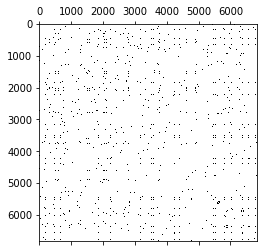

In [20]:

plt.spy(w.todense())


In [ ]:
nx.draw(node_color=)

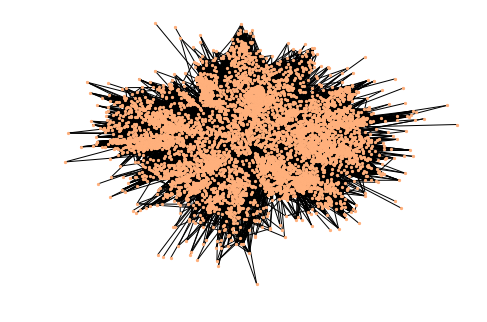

In [ ]:
nx.draw(g, node_size=5, figsize=(15, 15),node_color=sns.xkcd_rgb["peach"])

#### Détection des communautés : Validation croisée pour le k optimal

In [ ]:
from networkx.algorithms import community
cross_val_modularity = {}
cross_val_performance = {}
for k in tqdm_notebook(range(10, 30)):
    print("Partitionnement en {} clusters:".format(k))
    print("\n")

    start_time=time.time()
    tmp_modularity = []
    tmp_performance= []
    h=3
    for o in range(h):
        print("Epoche {}/{}".format(o,h))
        centroid, labels, score = spectralClustering(w,k)
        spectral_partition = {}
        for i, title in enumerate(network.keys()):
            spectral_partition[title] = labels[i]
        partition=partitions(spectral_partition)
        spectral_modularity = community.modularity(g,partition)
        tmp_modularity.append(spectral_modularity)
              
        spectral_performance = community.performance(g,partition)
        tmp_performance.append(spectral_performance)
    cross_val_modularity[k] = [np.mean(tmp_modularity), np.std(tmp_modularity)]
    cross_val_performance[k] = [np.mean(tmp_performance), np.std(tmp_performance)]
    print("Durée: %s seconds " % (time.time() - start_time)) 

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

Partitionnement en 10 clusters:


Epoche 0/3
1-Calcul du laplacien ..................... 
0-Calcul de la matrice dégré d ..................... 
2-Calcul des 10 vecteurs associés aux 10 plus petites valeurs propres du laplacien ..................... 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



3-Partitionnement des vecteurs propres en avec kmeans ..................... 
Initialisation des clusters .....................
 
Epoche 1/3
1-Calcul du laplacien ..................... 
0-Calcul de la matrice dégré d ..................... 
2-Calcul des 10 vecteurs associés aux 10 plus petites valeurs propres du laplacien ..................... 
3-Partitionnement des vecteurs propres en avec kmeans ..................... 
Initialisation des clusters .....................
 


In [27]:
cross_val = load_obj('cross_val_modularity_norme')
cross_val



{10: [0.6015013787282447, 0.013945822128576134],
 11: [0.6081820409772097, 0.015955455553936362],
 12: [0.5995288498401563, 0.03786500735766774],
 13: [0.6026649197973966, 0.025584068271468356],
 14: [0.6250111190325973, 0.012219375742946731],
 15: [0.6300575354042526, 0.01470790796279166],
 16: [0.6095523500762604, 0.051441515019249984],
 17: [0.6206848502876795, 0.025096291017262417],
 18: [0.6267674955148383, 0.01784597874878503],
 19: [0.6208144081129658, 0.02259585074913979],
 20: [0.5926301429352537, 0.015709397518534063],
 21: [0.5998476577576, 0.020802607816042092],
 22: [0.5851715552963157, 0.02838720206609779],
 23: [0.5768202755179558, 0.04269192482520193],
 24: [0.5867619089540489, 0.036354769223256686],
 25: [0.5903109466108127, 0.021178475389966],
 26: [0.6152619560420308, 0.01563101209873618],
 27: [0.5763836161584207, 0.05229639433215151],
 28: [0.5768262512108991, 0.03664520687643051],
 29: [0.6140284317770895, 0.01885195331701445]}

In [28]:
cross_val=pd.DataFrame.from_dict(cross_val)
cross_val=cross_val.transpose()
k_optimal=cross_val[0].idxmax(axis=0)
print(k_optimal)

15


1-Calcul du laplacien ..................... 
0-Calcul de la matrice dégré d ..................... 
2-Calcul des 15 vecteurs associés aux 15 plus petites valeurs propres du laplacien ..................... 


C:\Anacond\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



3-Partitionnement des vecteurs propres en avec kmeans ..................... 
Initialisation des clusters .....................
 
Durée: 146.985267162323 seconds 


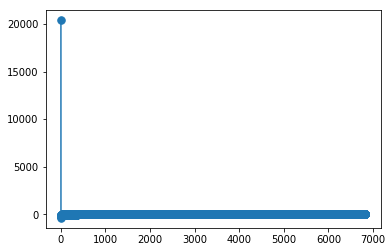

In [29]:
k=k_optimal
w = nx.adjacency_matrix(g)
start_time = time.time()
centroid_ , labels, score = spectralClustering(w,k)
print("Durée: %s seconds " % (time.time() - start_time))

#### Visualition des communautés

In [30]:
# spectral_partition = {}
for i, title in enumerate(network.keys()):
    #print(title)
    spectral_partition[title] = labels[i]


spectral_bag = get_bag_of_communities(network, spectral_partition)


spectral_counts = [0 for _ in range(k)]
for i, title in enumerate(spectral_partition.keys()):
    spectral_counts[spectral_partition[title]] += 1



for i in range(k):
    sorted_bag = sorted(spectral_bag[i].items(), key=operator.itemgetter(1), reverse=True)
    print(' ')
    print('Communauté {}/{} ({} pages) : '.format(i+1, k, spectral_counts[i]))
    if spectral_counts[i] > 0:
        for ind in range(10):
            print(sorted_bag[ind])

 
Communauté 1/15 (104 pages) : 
('Perry Como songs', 56)
('Music infoboxes with deprecated parameters', 31)
('Perry Como albums', 30)
('RCA Victor albums', 16)
('Andy Williams songs', 15)
('Frank Sinatra songs', 12)
('Number-one singles in the United States', 11)
('Pop standard stubs', 10)
('Songs written for films', 7)
('Number-one singles in Australia', 7)
 
Communauté 2/15 (139 pages) : 
('MacOS', 69)
('MacOS-only software made by Apple Inc.', 17)
('Macintosh stubs', 15)
('Apple Inc. software', 13)
('Classic Mac OS', 13)
('MacOS user interface', 11)
('IOS (Apple)', 10)
('X86-64 operating systems', 10)
('IOS software', 10)
('MacOS APIs', 10)
 
Communauté 3/15 (152 pages) : 
('National Football League teams', 30)
('National Football League seasons', 24)
('National Football League lists', 20)
('National Football League', 16)
('National Football League playoffs', 9)
('Sports clubs established in 1960', 9)
('History of the National Football League', 8)
('American Football League teams',

In [31]:
community2color = {
    0: sns.xkcd_rgb["peach"],
    1: sns.xkcd_rgb["powder blue"],
    2: sns.xkcd_rgb["light pink"],
    3: sns.xkcd_rgb["chocolate"],
    4: sns.xkcd_rgb["orange"],
    5: sns.xkcd_rgb["magenta"],
    6: sns.xkcd_rgb["purple"],
    7: sns.xkcd_rgb["blue"],
    8: sns.xkcd_rgb["deep blue"],
    9: sns.xkcd_rgb["sky blue"],
    10: sns.xkcd_rgb["olive"],
    11: sns.xkcd_rgb["seafoam green"],
    12: sns.xkcd_rgb["tan"],
    13: sns.xkcd_rgb["mauve"],
    14: sns.xkcd_rgb["hot pink"],
    15: sns.xkcd_rgb["pale green"],
    16: sns.xkcd_rgb["indigo"],
    17: sns.xkcd_rgb["lavender"],
    18: sns.xkcd_rgb["eggplant"],
    19: sns.xkcd_rgb["brick"],
    20: sns.xkcd_rgb["light blue"],
}

In [32]:
position = nx.spring_layout(g)

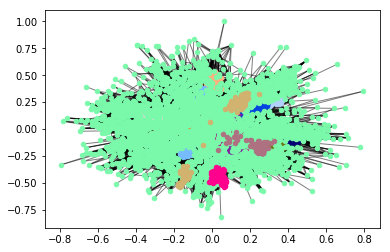

In [33]:


for community in set(spectral_partition.values()) :
    list_nodes = [nodes for nodes in spectral_partition.keys() if spectral_partition[nodes] == community]
    nx.draw_networkx_nodes(g, position, list_nodes, node_size=20, node_color=community2color[int(community)])

nx.draw_networkx_edges(g, position, alpha=0.5)
plt.show()



In [34]:
for i in spectral_partition.keys():
    spectral_partition[i] = str(spectral_partition[i])

In [35]:
nx.set_node_attributes(g, spectral_partition, 'spectral')

In [36]:
nx.write_graphml(g, 'data/full_graph.graphml')

## References

**[2]** von Luxburg, U., A Tutorial on Spectral Clustering, in *Statistics and Computing*, 17 (4), 2007.

